In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

## Obtain

In [2]:
raw_df = pd.read_csv('dataset/diabetic_data.csv')
raw_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Scrub + Explore

In [3]:
new_adm_type_id = []

for i in raw_df["admission_type_id"]:
    if i == 1:
        new_adm_type_id.append("Emergency")
    elif i == 2:
        new_adm_type_id.append("Urgent")
    elif i == 3:
        new_adm_type_id.append("Elective")
    elif i == 4:
        new_adm_type_id.append("Newborn")
    elif i == 5:
        new_adm_type_id.append("Not Available")
    elif i == 6:
        new_adm_type_id.append("NULL")
    elif i == 7:
        new_adm_type_id.append("Trauma Center")
    else:
        new_adm_type_id.append("Not Mapped")

In [4]:
raw_df['admission_type_id'] = new_adm_type_id
raw_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,NULL,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,Emergency,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,Emergency,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,Emergency,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,Emergency,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,Urgent,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,Elective,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,Emergency,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,Urgent,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,Elective,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Ineffective mapping

In [5]:
new_discharge_disposition = []

for i in raw_df["discharge_disposition_id"]:
    if i == 1:
        new_discharge_disposition.append("Discharged to home")
    elif i == 2:
        new_discharge_disposition.append("Discharged/transferred to another short term hospital")
    elif i == 3:
        new_discharge_disposition.append("Discharged/transferred to SNF")
    elif i == 4:
        new_discharge_disposition.append("Discharged/transferred to ICF")
    elif i == 5:
        new_discharge_disposition.append("Discharged/transferred to another type of inpatient care institution")
    elif i == 6:
        new_discharge_disposition.append("Discharged/transferred to home with home health service")
    elif i == 7:
        new_discharge_disposition.append("Left AMA")
    elif i == 8:
        new_discharge_disposition.append("Discharged/transferred to home under care of Home IV provider")
    elif i == 9:
        new_discharge_disposition.append("Admitted as an inpatient to this hospital")
    elif i == 10:
        new_discharge_disposition.append("Neonate discharged to another hospital for neonatal aftercare")
    elif i == 11:
        new_discharge_disposition.append("Expired")
    elif i == 12:
        new_discharge_disposition.append("Still patient or expected to return for outpatient services")
    elif i == 13:
        new_discharge_disposition.append("Hospice / home")
    elif i == 14:
        new_discharge_disposition.append("Hospice / medical facility")
    elif i == 15:
        new_discharge_disposition.append("Discharged/transferred within this institution to Medicare approved swing bed")
    elif i == 16:
        new_discharge_disposition.append("Discharged/transferred/referred another institution for outpatient services")
    elif i == 17:
        new_discharge_disposition.append("Discharged/transferred/referred to this institution for outpatient services")
    elif i == 18:
        new_discharge_disposition.append("NULL")
    elif i == 19:
        new_discharge_disposition.append("Expired at home. Medicaid only, hospice")
    elif i == 20:
        new_discharge_disposition.append("Expired in a medical facility. Medicaid only, hospice")
    elif i == 21:
        new_discharge_disposition.append("Expired, place unknown. Medicaid only, hospice")
    elif i == 22:
        new_discharge_disposition.append("Discharged/transferred to another rehab fac including rehab units of a hospital")
    elif i == 23:
        new_discharge_disposition.append("Discharged/transferred to a long term care hospital")
    elif i == 24:
        new_discharge_disposition.append("Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare")
    elif i == 25:
        new_discharge_disposition.append("Not Mapped")
    elif i == 26:
        new_discharge_disposition.append("Unknown/Invalid")
    elif i == 27:
        new_discharge_disposition.append("Discharged/transferred to a federal health care facility")
    elif i == 28:
        new_discharge_disposition.append("Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital")
    elif i == 29:
        new_discharge_disposition.append("Discharged/transferred to a Critical Access Hospital (CAH)")
    else:
        new_discharge_disposition.append("Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere")

In [6]:
raw_df["discharge_disposition_id"] = new_discharge_disposition

#### Effective mapping

In [7]:
raw_df['admission_source_id'] = raw_df['admission_source_id'].map({1: 'Physician Referral', 
                                                                   2: 'Clinic Referral',
                                                                   3: 'HMO Referral', 
                                                                   4: 'Transfer from a hospital',
                                                                   5: 'Transfer from a Skilled Nursing Facility (SNF)',
                                                                   6: 'Transfer from another health care facility',
                                                                   7: 'Emergency Room',
                                                                   8: 'Court/Law Enforcement',
                                                                   9: 'Not Available',
                                                                   10: 'Transfer from critial access hospital',
                                                                   11: 'Normal Delivery',
                                                                   12: 'Premature Delivery',
                                                                   13: 'Sick Baby',
                                                                   14: 'Extramural Birth',
                                                                   15: 'Not Available',
                                                                   17: 'NULL',
                                                                   18: 'Transfer From Another Home Health Agency',
                                                                   19: 'Readmission to Same Home Health Agency',
                                                                   20: 'Not Mapped',
                                                                   21: 'Unknown/Invalid',
                                                                   22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
                                                                   23: 'Born inside this hospital',
                                                                   24: 'Born outside this hospital',
                                                                   25: 'Transfer from Ambulatory Surgery Center',
                                                                   26: 'Transfer from Hospice', })

In [8]:
raw_df.rename(columns={'admission_type_id': 'admission_type', 
                       'discharge_disposition_id': "discharge_disposition", 
                       'admission_source_id': "admission_source"}, inplace=True)

In [9]:
# rows that has '?' in weight (98569 out of 101766)
len(raw_df[(raw_df['weight'] == '?')])

98569

In [10]:
raw_df_all_objects = raw_df.astype('object')
raw_df_all_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type              101766 non-null object
discharge_disposition       101766 non-null object
admission_source            101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

#### Dropping columns that contain too many '?'
If >50% of the values are '?', drop it

In [11]:
col_names = list(raw_df_all_objects)
question_mark_counts = {}

def get_question_mark_count(col_name):
    count = len(raw_df_all_objects[(raw_df_all_objects[col_name] == '?')])
    return count

for name in col_names:
    count = get_question_mark_count(name)
    question_mark_counts[name] = count
    
question_mark_counts

{'A1Cresult': 0,
 'acarbose': 0,
 'acetohexamide': 0,
 'admission_source': 0,
 'admission_type': 0,
 'age': 0,
 'change': 0,
 'chlorpropamide': 0,
 'citoglipton': 0,
 'diabetesMed': 0,
 'diag_1': 21,
 'diag_2': 358,
 'diag_3': 1423,
 'discharge_disposition': 0,
 'encounter_id': 0,
 'examide': 0,
 'gender': 0,
 'glimepiride': 0,
 'glimepiride-pioglitazone': 0,
 'glipizide': 0,
 'glipizide-metformin': 0,
 'glyburide': 0,
 'glyburide-metformin': 0,
 'insulin': 0,
 'max_glu_serum': 0,
 'medical_specialty': 49949,
 'metformin': 0,
 'metformin-pioglitazone': 0,
 'metformin-rosiglitazone': 0,
 'miglitol': 0,
 'nateglinide': 0,
 'num_lab_procedures': 0,
 'num_medications': 0,
 'num_procedures': 0,
 'number_diagnoses': 0,
 'number_emergency': 0,
 'number_inpatient': 0,
 'number_outpatient': 0,
 'patient_nbr': 0,
 'payer_code': 40256,
 'pioglitazone': 0,
 'race': 2273,
 'readmitted': 0,
 'repaglinide': 0,
 'rosiglitazone': 0,
 'time_in_hospital': 0,
 'tolazamide': 0,
 'tolbutamide': 0,
 'troglit

In [16]:
original_df = pd.read_csv('dataset/diabetic_data.csv')

In [17]:
labels = original_df['readmitted']
df = original_df.drop(['weight', 'encounter_id', 'patient_nbr', 'readmitted'], 1)

### Visualizations

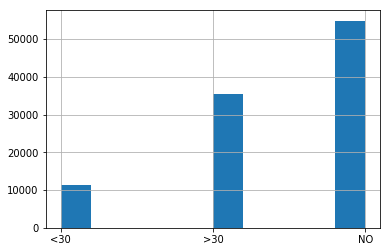

In [12]:
raw_df["readmitted"].hist()

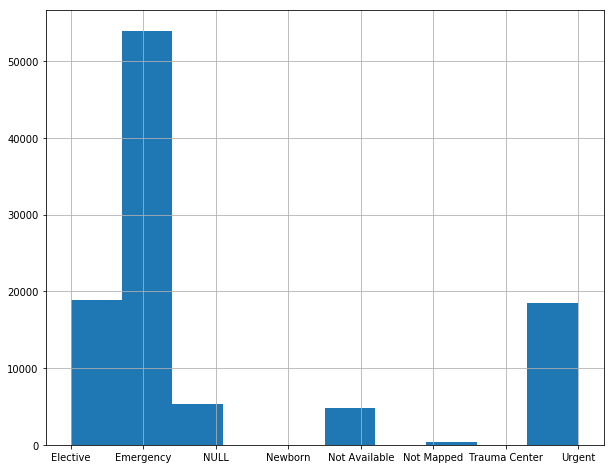

In [13]:
raw_df["admission_type"].hist(figsize=(10, 8))

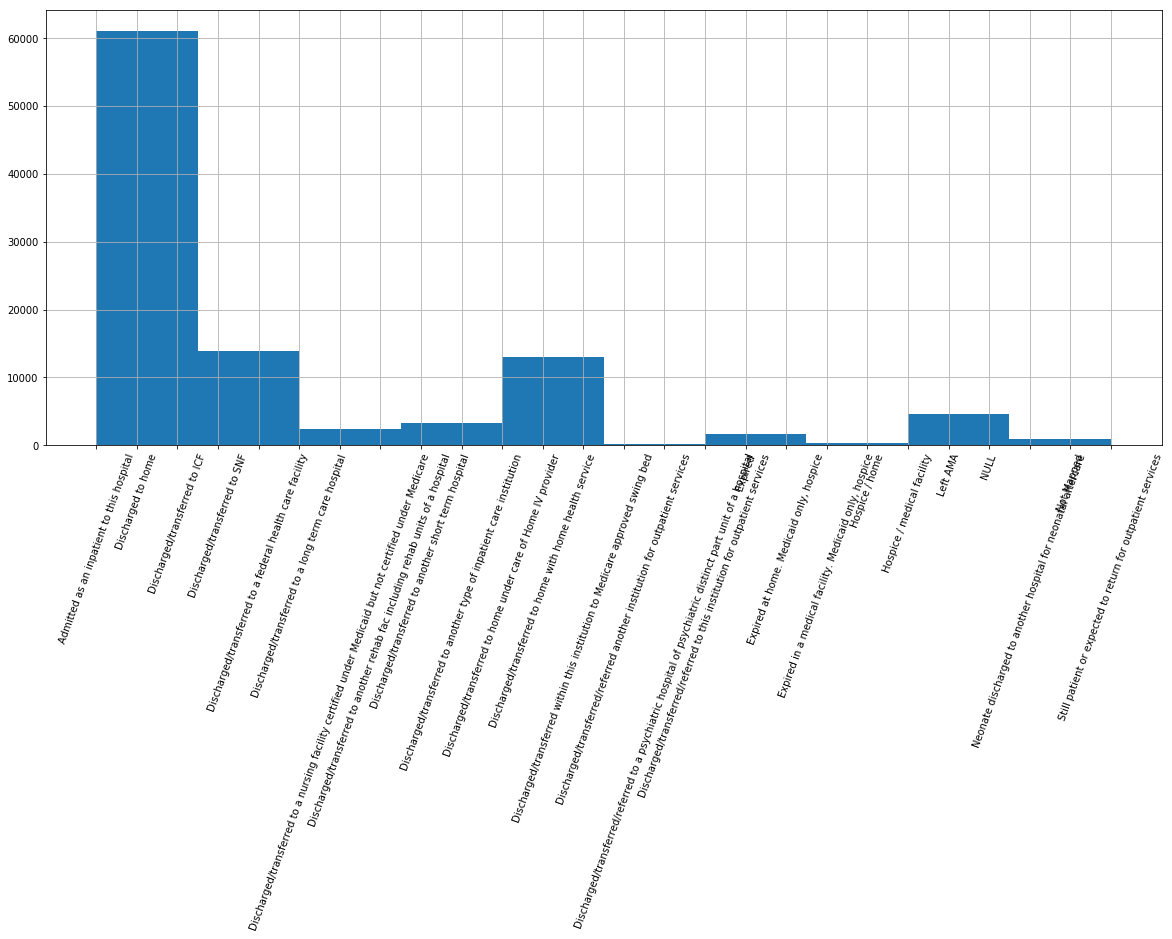

In [14]:
raw_df["discharge_disposition"].hist(xrot=70, figsize=(20, 8))

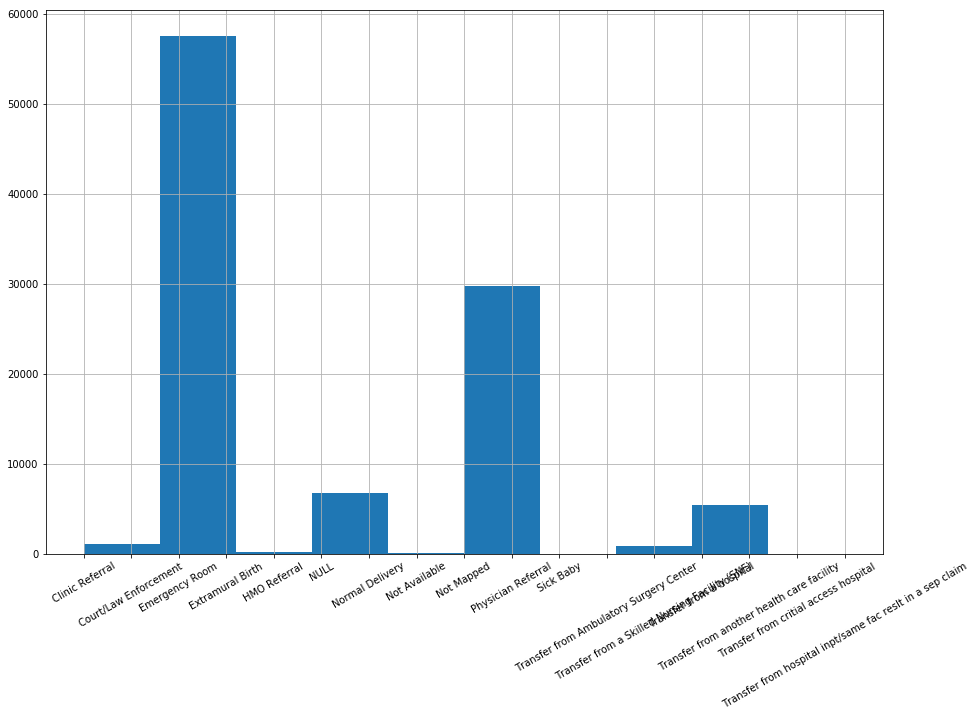

In [15]:
raw_df["admission_source"].hist(xrot =30, figsize=(15, 10))
# raw_df["admission_source"].plot(kind='bar', rot=30, figsize=(15, 10))

### Transforming column values (from text -> int) using one-hot encoding 

Inspect unique values in each column to determine whether one-hot encoding is necessary.
- If the unique values have **no numerical correlation**. One-hot encode it. e.g. **gender, race**
- if the unique values have **numerical correlation**, leave it. e.g. **times in hospital**

In [18]:
original_col_names = list(df)
unique_values = {}
for name in original_col_names:
    unique_values[name] =(df['{}'.format(name)].unique())
unique_values

{'A1Cresult': array(['None', '>7', '>8', 'Norm'], dtype=object),
 'acarbose': array(['No', 'Steady', 'Up', 'Down'], dtype=object),
 'acetohexamide': array(['No', 'Steady'], dtype=object),
 'admission_source_id': array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13]),
 'admission_type_id': array([6, 1, 2, 3, 4, 5, 8, 7]),
 'age': array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
        '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object),
 'change': array(['No', 'Ch'], dtype=object),
 'chlorpropamide': array(['No', 'Steady', 'Down', 'Up'], dtype=object),
 'citoglipton': array(['No'], dtype=object),
 'diabetesMed': array(['No', 'Yes'], dtype=object),
 'diag_1': array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
        '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
        'V57', '189', '786', '427', '996', '277', '584', '462', '473',
        '411', '174', '486', '998', '511', '432', '626', '295', '1

Transform labels into 3 categories with one-hot encoding as well. Here are the 3 categories in the 'readmitted' column which is the label for our model training.
- 'NO'
- '>30'
- '<30'

In [19]:
encoder = LabelBinarizer()
transfomed_labels = encoder.fit_transform(labels)
transfomed_labels

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ..., 
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

#### One-hot encode necessary columns

In [20]:
def one_hot_encoding(col_name):
    encoded = pd.get_dummies(df['{}'.format(col_name)], prefix=col_name)
    return encoded

new_race = one_hot_encoding('race')
new_gender = one_hot_encoding("gender")
new_adm_type = one_hot_encoding('admission_type_id')
new_discharge_dispo_id = one_hot_encoding('discharge_disposition_id')
new_adm_src_id = one_hot_encoding('admission_source_id')
new_alcresult = one_hot_encoding('A1Cresult')
new_acarbose = one_hot_encoding('acarbose')
new_acetohexamide = one_hot_encoding('acetohexamide')
new_change = one_hot_encoding('change')
new_chlorpropamide = one_hot_encoding('chlorpropamide')
new_citoglipton = one_hot_encoding('citoglipton')
new_diabetesMed = one_hot_encoding('diabetesMed')
new_examide = one_hot_encoding('examide')
new_glimepiride = one_hot_encoding('glimepiride')
new_glimepiride_pioglitazone = one_hot_encoding('glimepiride-pioglitazone')
new_glyburide = one_hot_encoding('glyburide')
new_glyburide_metformin = one_hot_encoding('glyburide-metformin')
new_insulin = one_hot_encoding('insulin')
new_max_glu_serum = one_hot_encoding('max_glu_serum')
new_medical_specialty = one_hot_encoding('medical_specialty')
new_metformin = one_hot_encoding('metformin')
new_metformin_pioglitazone = one_hot_encoding('metformin-pioglitazone')
new_metformin_rosiglitazone = one_hot_encoding('metformin-rosiglitazone')
new_miglitol = one_hot_encoding('miglitol')
new_nateglinide = one_hot_encoding('nateglinide')
new_payer_code = one_hot_encoding('payer_code')
new_pioglitazone = one_hot_encoding('pioglitazone')
new_repaglinide = one_hot_encoding('repaglinide')
new_rosiglitazone = one_hot_encoding('rosiglitazone')
new_tolazamide = one_hot_encoding('tolazamide')
new_tolbutamide = one_hot_encoding('tolbutamide')
new_troglitazone = one_hot_encoding('troglitazone')

In [21]:
new_age = df['age'].map({'[0-10)': 10, 
                         '[10-20)': 20, 
                         '[20-30)': 30, 
                         '[30-40)': 40, 
                         '[40-50)': 50, 
                         '[50-60)': 60,
                         '[60-70)': 70, 
                         '[70-80)': 80, 
                         '[80-90)': 90, 
                         '[90-100)': 100})

In [22]:
new_dfs = [new_acarbose, new_acetohexamide,new_age, new_adm_src_id, new_adm_type, 
           new_alcresult, new_change, new_chlorpropamide, new_citoglipton, 
           new_diabetesMed, new_discharge_dispo_id, new_examide, new_gender, 
           new_glimepiride, new_glimepiride_pioglitazone, new_glyburide, 
           new_glyburide_metformin, new_insulin, new_max_glu_serum, 
           new_medical_specialty, new_metformin, new_metformin_pioglitazone, new_metformin_rosiglitazone, 
           new_miglitol, new_nateglinide, new_payer_code, new_pioglitazone, new_race, new_repaglinide, 
           new_rosiglitazone, new_tolazamide, new_tolbutamide, new_troglitazone]

#### Concatenate all new columns to a dataframe

In [23]:
transformed_df = pd.concat(new_dfs, axis=1)

In [24]:
transformed_df

,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,acetohexamide_No,acetohexamide_Steady,age,admission_source_id_1,admission_source_id_2,admission_source_id_3,...,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,tolazamide_No,tolazamide_Steady,tolazamide_Up,tolbutamide_No,tolbutamide_Steady,troglitazone_No,troglitazone_Steady
0,0,1,0,0,1,0,10,1,0,0,...,1,0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,0,20,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,30,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,1,0,0,1,0,40,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,50,0,0,0,...,1,0,0,1,0,0,1,0,1,0
5,0,1,0,0,1,0,60,0,1,0,...,1,0,0,1,0,0,1,0,1,0
6,0,1,0,0,1,0,70,0,1,0,...,1,0,0,1,0,0,1,0,1,0
7,0,1,0,0,1,0,80,0,0,0,...,1,0,0,1,0,0,1,0,1,0
8,0,1,0,0,1,0,90,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9,0,1,0,0,1,0,100,0,0,0,...,0,1,0,1,0,0,1,0,1,0


## Model

In [25]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df, transfomed_labels, test_size=0.5)

In [27]:
# y_train = np_utils.to_categorical(y_train, 3)
# y_test = np_utils.to_categorical(y_test, 3)
y_train.shape

(50883, 3)

In [28]:
X_train.shape

(50883, 229)

In [29]:
X_test.shape

(50883, 229)

In [35]:
#accuracy: 0.5505
# model = Sequential()
# model.add(Dense(228, input_shape=(228,)))
# model.add(Activation('sigmoid'))
# model.add(Dense(114))
# # model.add(Dropout(0.2))
# model.add(Activation('sigmoid'))
# model.add(Dense(100))
# # model.add(Dropout(0.2))
# model.add(Activation('sigmoid'))
# model.add(Dense(57))
# # model.add(Dropout(0.2))
# model.add(Activation('sigmoid'))
# # model.add(Dropout(0.2))
# model.add(Dense(3))
# model.add(Activation('softmax'))
# model.summary()

# accuracy: 54.28 
model = Sequential()
model.add(Dense(229, input_shape=(229,)))
model.add(Activation('relu'))
model.add(Dense(114))
# model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(100))
# model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(57))
# model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(28))
# model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 229)               52670     
_________________________________________________________________
activation_5 (Activation)    (None, 229)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 114)               26220     
_________________________________________________________________
activation_6 (Activation)    (None, 114)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               11500     
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 57)                5757      
__________

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.fit(X_train, y_train,
          batch_size=128, epochs=20, verbose=1,
          validation_data=(X_test, y_test))

Train on 50883 samples, validate on 50883 samples
Epoch 1/20
50883/50883 [==============================] - 3s 50us/step - loss: 0.9678 - acc: 0.5370 - val_loss: 0.9362 - val_acc: 0.5380
Epoch 2/20
50883/50883 [==============================] - 2s 44us/step - loss: 0.9428 - acc: 0.5402 - val_loss: 0.9330 - val_acc: 0.5380
Epoch 3/20
50883/50883 [==============================] - 2s 42us/step - loss: 0.9325 - acc: 0.5396 - val_loss: 0.9216 - val_acc: 0.5380
Epoch 4/20
50883/50883 [==============================] - 2s 44us/step - loss: 0.9259 - acc: 0.5403 - val_loss: 0.9173 - val_acc: 0.5380
Epoch 5/20
50883/50883 [==============================] - 2s 48us/step - loss: 0.9221 - acc: 0.5394 - val_loss: 0.9165 - val_acc: 0.5379
Epoch 6/20
50883/50883 [==============================] - 2s 40us/step - loss: 0.9186 - acc: 0.5394 - val_loss: 0.9176 - val_acc: 0.5380
Epoch 7/20
50883/50883 [==============================] - 2s 43us/step - loss: 0.9177 - acc: 0.5419 - val_loss: 0.9134 - val_acc

### Findings in training process
- No matter how many Dense layers or dropout I added, the results fell between 0.53 - 0.55

> Compare it to shallow algorithms
- Why?
- Which algorithm to recommend to your boss
- 3 categories -> Yes or No